In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("preprocessed_diabetes_dataset.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['gender', 'smoking_history', 'bmi_category']
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

In [5]:
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [6]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [10]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [12]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nROC AUC Score:", roc_auc)

Accuracy: 0.8843473738949558

Confusion Matrix:
 [[15516  2018]
 [  206  1490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17534
           1       0.42      0.88      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.88      0.90     19230


ROC AUC Score: 0.9601113591168424


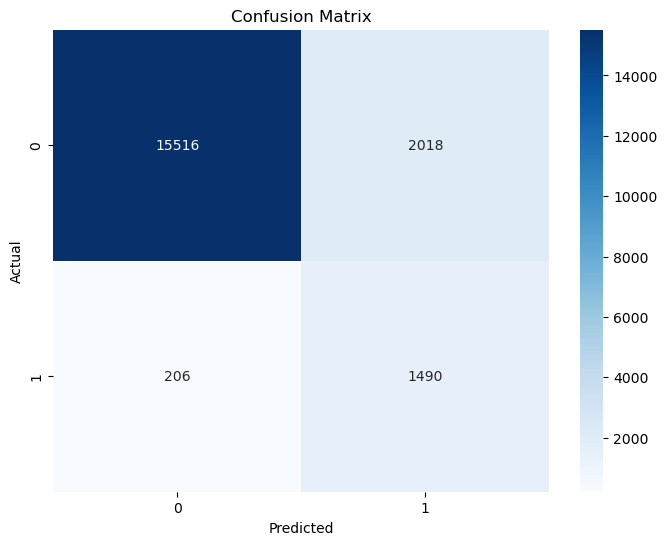

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()